In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
ufc = pd.read_csv(r"archive/ufc-master.csv")
print(ufc.shape)
ufc.head()

(4896, 119)


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0


<AxesSubplot:xlabel='Winner', ylabel='R_odds'>

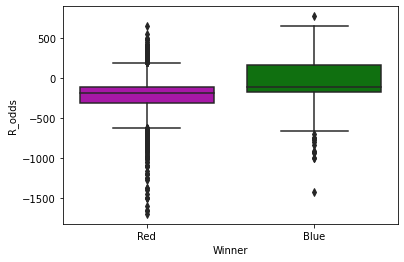

In [29]:
sns.boxplot(x="Winner", y="R_odds", palette=["m", "g"], data=ufc)

<AxesSubplot:xlabel='Winner', ylabel='B_avg_SIG_STR_landed'>

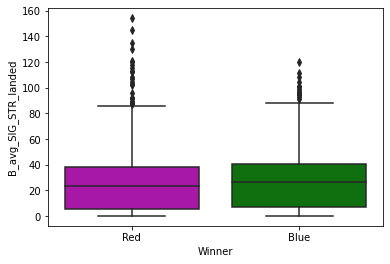

In [26]:
sns.boxplot(x="Winner", y="B_avg_SIG_STR_landed", palette=["m", "g"], data=ufc)

<AxesSubplot:xlabel='Winner', ylabel='B_avg_SUB_ATT'>

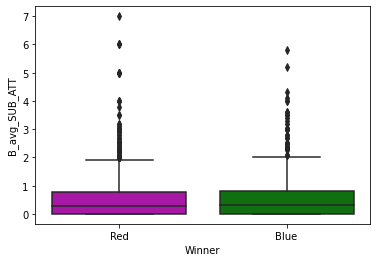

In [27]:
sns.boxplot(x="Winner", y="B_avg_SUB_ATT", palette=["m", "g"], data=ufc)

<AxesSubplot:xlabel='Winner', ylabel='B_avg_TD_landed'>

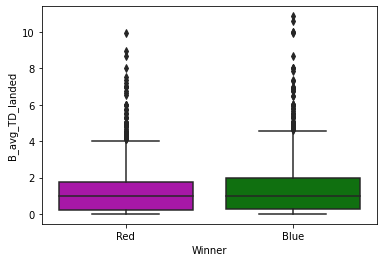

In [28]:
sns.boxplot(x="Winner", y="B_avg_TD_landed", palette=["m", "g"], data=ufc)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sample = ufc[["Winner", "R_odds", "B_odds", "B_avg_SIG_STR_landed", "R_avg_SIG_STR_landed", "B_avg_SUB_ATT", "R_avg_SUB_ATT", "B_avg_TD_landed", "R_avg_TD_landed"]]

win = {"Red" : 1, "Blue" : 0}
sample["Winner"] = [win[item] for item in sample["Winner"]]

sample.dropna(inplace = True)

data_raw = sample.drop(columns=["Winner"])
#standard scaling all data to get into 0 mean and unit variance
data = StandardScaler().fit_transform(data_raw)
target = sample["Winner"]

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25, random_state=216)

sample.head()

/var/folders/mm/72wqtbpj6bs8mkk5cb1c91p80000gp/T/ipykernel_2362/3275069530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["Winner"] = [win[item] for item in sample["Winner"]]
/Users/seanli/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Winner,R_odds,B_odds,B_avg_SIG_STR_landed,R_avg_SIG_STR_landed,B_avg_SUB_ATT,R_avg_SUB_ATT,B_avg_TD_landed,R_avg_TD_landed
0,1,-150.0,130,3.42,3.95,0.7,0.1,0.24,0.61
1,0,170.0,-200,5.16,2.97,0.8,0.5,0.79,2.27
2,0,110.0,-130,2.92,3.77,0.1,1.7,1.15,4.48
3,1,-675.0,475,4.04,3.79,0.0,0.0,0.00,1.57
4,0,-135.0,115,5.22,2.64,0.0,0.6,2.54,2.85


0.6607883817427386


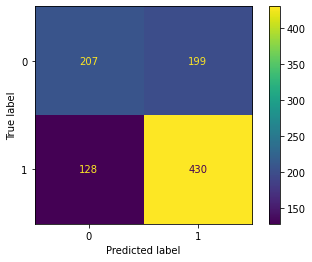

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

#creating the model
logmod = LogisticRegression(max_iter = 1000)
#prepare cross validation feature
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#fit the model to training data
logmod.fit(X = train_data, y = train_target)

logscore = logmod.score(test_data, test_target)
print(logscore)
plot_confusion_matrix(logmod, test_data, test_target)

In [21]:
# evaluate model
scores = cross_val_score(logmod, test_data, test_target, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.655 (0.047)


In [16]:
#more metrics to evaluate model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mseLog = mean_squared_error(test_target, logmod.predict(test_data))
r2Log = r2_score(test_target, logmod.predict(test_data))
print("MSE:", mseLog, "r^2:", r2Log)

MSE: 0.3392116182572614 r^2: -0.39144022458816696


29
0.6338174273858921


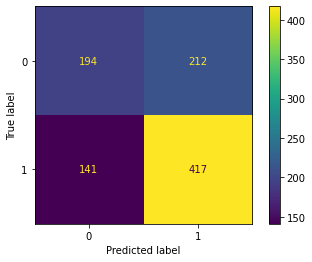

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params_to_try = {"n_neighbors" : range(1, 30)}
knn_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params_to_try)
knn_search.fit(train_data, train_target)
best_params = knn_search.best_params_["n_neighbors"]
nscore = knn_search.score(test_data, test_target)

print(best_params)
print(nscore)
plot_confusion_matrix(knn_search, test_data, test_target)

In [9]:
predict = ufc[["R_fighter", "B_fighter", "Winner", "R_odds", "B_odds", "B_avg_SIG_STR_landed", "R_avg_SIG_STR_landed", "B_avg_SUB_ATT", "R_avg_SUB_ATT", "B_avg_TD_landed", "R_avg_TD_landed"]]
predict.dropna(inplace = True)

Rmcgregor = predict[predict["R_fighter"] == "Conor McGregor"]
Rmcgregor = Rmcgregor[["R_avg_SIG_STR_landed", "R_avg_SUB_ATT", "R_avg_TD_landed"]]
Rmcgregor = Rmcgregor.rename(columns = {"R_avg_SIG_STR_landed" : "avg_SIG_STR_landed", "R_avg_SUB_ATT" : "avg_SUB_ATT", "R_avg_TD_landed" : "avg_TD_landed"})

Bmcgregor = predict[predict["B_fighter"] == "Conor McGregor"]
Bmcgregor = Bmcgregor[["B_avg_SIG_STR_landed", "B_avg_SUB_ATT", "B_avg_TD_landed"]]
Bmcgregor = Bmcgregor.rename(columns = {"B_avg_SIG_STR_landed" : "avg_SIG_STR_landed", "B_avg_SUB_ATT" : "avg_SUB_ATT", "B_avg_TD_landed" : "avg_TD_landed"})

mcgregor = pd.concat([Rmcgregor, Bmcgregor])
mcgregorstats = mcgregor.mean()
mcgregorstats = mcgregorstats.rename({"avg_SIG_STR_landed" : "R_avg_SIG_STR_landed", "avg_SUB_ATT" : "R_avg_SUB_ATT", "avg_TD_landed" : "R_avg_TD_landed"})


Rkhabib = predict[predict["R_fighter"] == "Khabib Nurmagomedov"]
Rkhabib = Rkhabib[["R_avg_SIG_STR_landed", "R_avg_SUB_ATT", "R_avg_TD_landed"]]
Rkhabib = Rkhabib.rename(columns = {"R_avg_SIG_STR_landed" : "avg_SIG_STR_landed", "R_avg_SUB_ATT" : "avg_SUB_ATT", "R_avg_TD_landed" : "avg_TD_landed"})

Bkhabib = predict[predict["B_fighter"] == "Khabib Nurmagomedov"]
Bkhabib = Bkhabib[["B_avg_SIG_STR_landed", "B_avg_SUB_ATT", "B_avg_TD_landed"]]
Bkhabib = Bkhabib.rename(columns = {"B_avg_SIG_STR_landed" : "avg_SIG_STR_landed", "B_avg_SUB_ATT" : "avg_SUB_ATT", "B_avg_TD_landed" : "avg_TD_landed"})

khabib = pd.concat([Rkhabib, Bkhabib])
khabibstats = khabib.mean()
khabibstats = khabibstats.rename({"avg_SIG_STR_landed" : "B_avg_SIG_STR_landed", "avg_SUB_ATT" : "B_avg_SUB_ATT", "avg_TD_landed" : "B_avg_TD_landed"})

fight = pd.concat([mcgregorstats, khabibstats])
fight["R_odds"] = 165
fight["B_odds"] = -190
fight = fight.to_frame().T

print(logmod.predict(fight))
print(logmod.predict_proba(fight))

print(knn_search.predict(fight))
print(knn_search.predict_proba(fight))

[0]
[[1.00000000e+00 2.22908406e-11]]
[1]
[[0.30769231 0.69230769]]


/Users/seanli/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#creating a deep learning model using Pytorch
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim